In [1]:
from glycan import glycan
from read_functions_scaled import *
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
h3n2 = read_H3N2_data()

# Cutoff for H3N2 is 0.01
cutoff = 0.01

g = glycan()
# Randomly split data into training and testing.
X_train, Y_train, X_test, Y_test, minMaxList = g.getTrainTest(h3n2, cutoff = cutoff, dropDP=True)

# Create an SVM classifier
clf = svm.SVC(verbose=False)

# Train algorithm
clf.fit(X_train, Y_train)

# Make predictions on the training data
preds1 = clf.predict(X_train)

# Make predictions with the testing data.
# This is what is used for validation
preds = clf.predict(X_test)

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A v

In [3]:
print("\n\n\n")
print("Accuracy: ", "%.3f"%accuracy_score(Y_test, preds))
print("Precision: ", "%.3f"%precision_score(Y_test, preds))
print("Recall: ", "%.3f"%recall_score(Y_test, preds))
print("F1 score: ", "%.3f"%f1_score(Y_test, preds))
print("\n\n")





Accuracy:  0.912
Precision:  1.000
Recall:  0.850
F1 score:  0.919





In [4]:
# Calculate confusion matrix
cf = confusion_matrix(Y_test, preds)

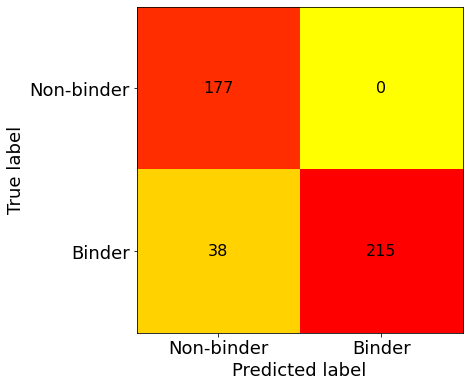

In [5]:
g.plotConfusion(cf, ['Non-binder', 'Binder'])
plt.savefig("Plots/SVM_test_H3N2.pdf")